# NGS (Next Generation Sequencing) 기초

- 1KGP (1,000 Genomes Project) : 현재 2,500여명의 게놈 데이터 분석. 26개 인종으로 분류됨.
- 사용 데이터 : 아프리카 요바루족 여성.

```
!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
```

### FASTQ 파일 다루기

In [1]:
from collections import defaultdict
import gzip

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO

In [2]:
recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')

rec = next(recs)  # iterator

print(rec.id)
print(rec.description)
print(rec.seq)
print(rec.letter_annotations)   # phred 점수

# phred 점수 : 각 염기서열에서 오류가 발생할 수 있는 확률을 점수로 표현. 아스키코드로 표시. sequencer에 따라 표기법 다름.
# phred_quality는 확률의 대수적 표현이다. 
# 맞을 확률 (%) : 10 = 90, 20 = 99, 30 = 99.9, 40 = 99.99, 60 = 99.9999
# biopython에서 아스키코드를 자동으로 점수로 변환한다.

SRR003265.31
SRR003265.31 3042NAAXX:3:1:1252:1819 length=51
GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


In [3]:
# 각 염기별 분포 확인
# 염기를 구분할 수 없는 경우 N으로 표시됨.

recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')

cnt = defaultdict(int)

for rec in recs:
    for letter in rec.seq:
        cnt[letter] += 1
        
tot = sum(cnt.values())

for letter, cnt in cnt.items():
    print('%s: %.2f %d' % (letter, 100. * cnt / tot, cnt))

G: 20.68 5359334
A: 28.60 7411965
C: 21.00 5444053
T: 29.58 7666885
N: 0.14 37289


(1.0, 51.0)

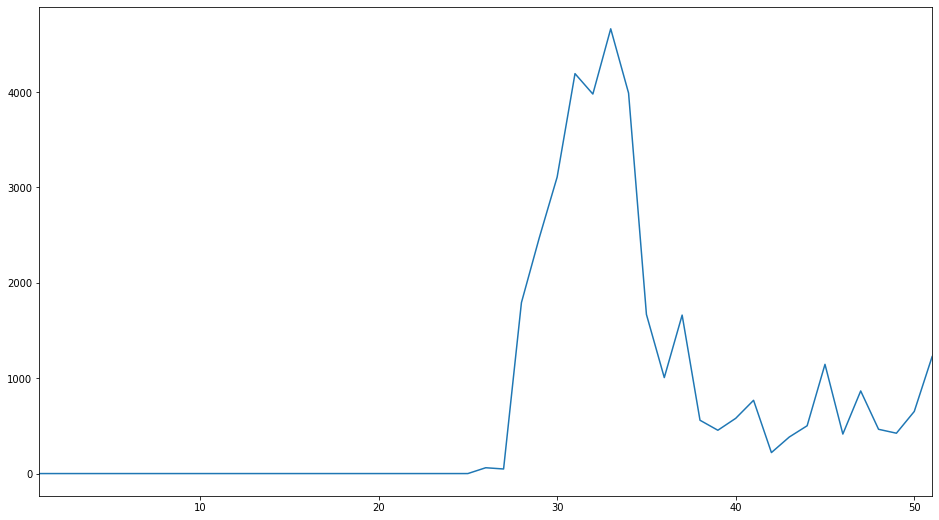

In [4]:
# N 이 분포하는 위치를 시각화

recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')

n_cnt = defaultdict(int)
for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i + 1
        if letter == 'N':
            n_cnt[pos] += 1
            
seq_len = max(n_cnt.keys())
positions = range(1, seq_len + 1)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(positions, [n_cnt[x] for x in positions]) # 각 서열 위치에 있는 N의 갯수
ax.set_xlim(1, seq_len)

In [5]:
# phred_quality 의 분포 확인
# 처음 25번째 서열까지는 N이 존재하지 않으므로 무시

recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')

cnt_qual = defaultdict(int)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25:
            continue
        cnt_qual[qual] += 1

# 각 점수별 갯수 및 비율
tot = sum(cnt_qual.values())

cnt_qual_s = sorted(cnt_qual.items(), reverse=True)  # sort by key

# cnt_qual_s = sorted(cnt_qual.items(), key=lambda kv: kv[1])  # sort by value

for qual, cnt in cnt_qual_s:
    print('%02d: %.2f %d' % (qual, 100. * cnt / tot, cnt))

40: 22.76 3007221
39: 0.78 102568
38: 0.80 106290
37: 0.84 111179
36: 0.88 115701
35: 0.91 120704
34: 0.95 125624
33: 0.99 131291
32: 1.03 136763
31: 1.08 142464
30: 1.13 149449
29: 1.17 154892
28: 1.23 162226
27: 1.28 168902
26: 1.33 176263
25: 1.40 184846
24: 1.46 193259
23: 1.52 201164
22: 1.59 209905
21: 1.66 219602
20: 1.73 228923
19: 1.81 239621
18: 1.88 248982
17: 1.97 259779
16: 2.05 270431
15: 2.12 280719
14: 2.20 291341
13: 2.28 301033
12: 2.35 309918
11: 2.41 318303
10: 4.95 654154
09: 2.51 332259
08: 2.53 334410
07: 2.51 331743
06: 2.50 330834
05: 4.88 645266
04: 4.77 630923
03: 4.04 533458
02: 3.77 498679
01: 1.52 200558
00: 0.40 52229


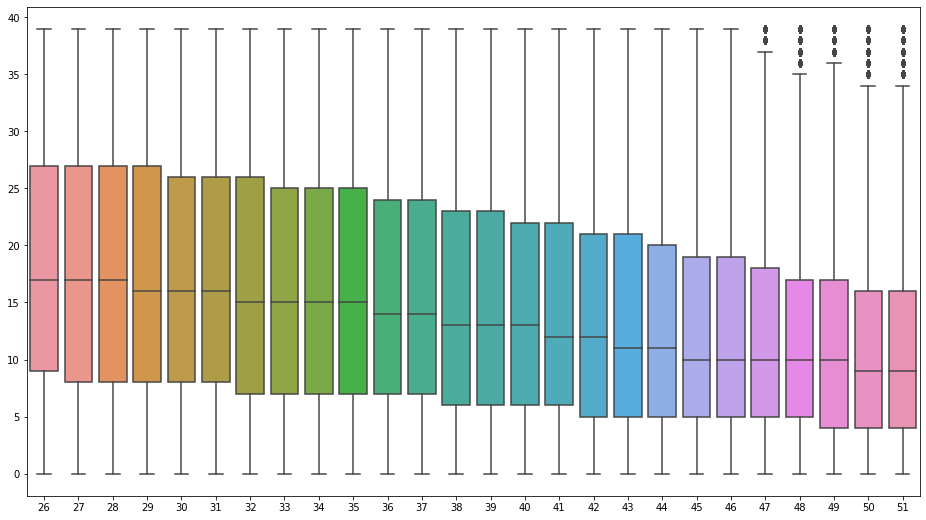

In [6]:
# 위치별 품질 분포.
# 처음 25개 서열 제외. phred_quality = 40 이면 제외.

recs = SeqIO.parse(gzip.open('data/SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')

qual_pos = defaultdict(list)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25 or qual == 40:
            continue
        pos = i + 1
        qual_pos[pos].append(qual)
        
vps = []
poses = list(qual_pos.keys())
poses.sort()

for pos in poses:
    vps.append(qual_pos[pos])
    
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=vps, ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])
plt.show()

## paired end data (양방향 염기서열 분석 데이터)

* 차세대 염기서열 데이터의 생물정보학적 분석.pdf 참조

```
Be careful as this will be 1GB of data (and fully optional)

!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265_1.filt.fastq.gz
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265_2.filt.fastq.gz
```

```
f1 = gzip.open('data/SRR003265_1.filt.fastq.gz', 'rt', encoding='utf8')
f2 = gzip.open('data/SRR003265_2.filt.fastq.gz', 'rt', encoding='utf8')
recs1 = SeqIO.parse(f1, 'fastq')
recs2 = SeqIO.parse(f2, 'fastq')
cnt = 0
for rec1, rec2 in zip(recs1, recs2):
    cnt +=1

print('Number of pairs: %d' % cnt)
```